In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
np.random.seed(1)

In [7]:
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,X_xor[:,1] > 0)
y_xor = np.where(y_xor,1,-1)
ST = svm.SVC(C=1.3,kernel = 'rbf',gamma = 0.5)
ST.fit(X_xor,y_xor)

SVC(C=1.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
def plot_decision_boundary(X,y,cl,test_idx = None):
    colors = ('blue','red','green','brown','green','blue')
    markers = ('s','x','^','+','v','^')
    x1,x2 = X[:,0].min()-1,X[:,0].max()+1
    x3,x4 = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1,x2,0.02),np.arange(x3,x4,0.02))
    Z = cl.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.8,colors = colors)
    # scatter plot for classes of output
    for idx,cl in enumerate(np.unique(y)):
          plt.scatter(X[y==cl,0],X[y==cl,1],color = colors[idx+3],marker = markers[idx],label = cl)
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c ='', edgecolor = 'black',alpha =2.0,linewidth = 1,marker = 'o',s = 100)

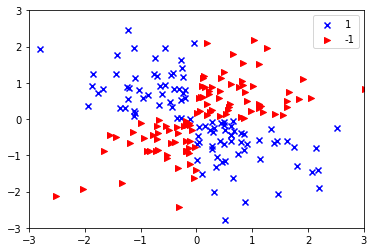

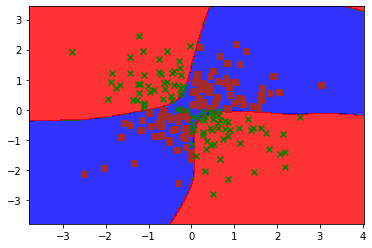

In [9]:
plt.scatter(X_xor[y_xor ==1,0],X_xor[y_xor ==1 ,1],color = 'blue',marker = 'x',label = '1')
plt.scatter(X_xor[y_xor == -1,0],X_xor[y_xor == -1 ,1],color = 'red',marker = '>',label = '-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.show()
plot_decision_boundary(X_xor,y_xor,ST,test_idx = None)